### Selective Classification
---

### SVHN
This notebook focuses on the "SVHN" dataset. The dataset contains approximately 100.000 32x32 color images representing house numbers obtained by Google Street View images. The idea is to map each digit in one of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10.<br>
In the specific case, the used dataset is the original one that can be 'raggiunto' by following <a href='http://ufldl.stanford.edu/housenumbers/'>link</a>.<br>
The training set consists in more or less the 74% of the entire dataset.

In [ ]:
# Clone the repository
!git clone https://github.com/Giordano-Cicchetti/MaskTune_NN/
!cp MaskTune_NN/SVHN/* /content -r
!rm MaskTune_NN/ -r

Cloning into 'MaskTune_NN'...
remote: Enumerating objects: 244, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 244 (delta 18), reused 28 (delta 12), pack-reused 204
Receiving objects: 100% (244/244), 18.16 MiB | 22.19 MiB/s, done.
Resolving deltas: 100% (112/112), done.


In [ ]:
!pip install timm
!pip install grad-cam
import torch
from TrainSVHN import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 11.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 54.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.6-py3-none-any.whl size=38261 sha256=19905fee9940366eb316a3f09b1bf7e2aca222d790def660834617be33981df5
  Stored in directory: /root/.cache/pip/wheels/53/02/43/1f75726b5c28459596067ad91e36951463c01273eef661f09f
Successfully built grad-cam


In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
# Build an instance of the class SVHNTrain
SVHN_train=SVHNTrain(device=device)

Using downloaded and verified file: data/train_32x32.mat
Using downloaded and verified file: data/test_32x32.mat
Using downloaded and verified file: data/train_32x32.mat


The used model is a **ResNet-32** trained from scratch for 300 epochs.

Code for training phase and testing phase can be analyzed in the file <a href="https://github.com/Giordano-Cicchetti/MaskTune_NN/blob/main/SVHN/TrainSVHN.py">SVHN/TrainSVHN.py</a>

#### Training

Parameters:


*   learning rate ⇒ 0.1
*   learning rate cut ⇒ halved for every 25 epochs
*   momentum ⇒ 0.9
*   weight decay ⇒ 0.0005
*   batch size ⇒ 128  

In [ ]:
# Let's start training
SVHN_train.train_erm()

validation epoch 0: 100%|██████████| 15/15 [00:02<00:00,  5.92it/s, loss=2.23, accuracy=0.192]


lr: 0.1


validation epoch 1: 100%|██████████| 15/15 [00:02<00:00,  5.96it/s, loss=2.23, accuracy=0.192]


lr: 0.1


validation epoch 2: 100%|██████████| 15/15 [00:02<00:00,  5.95it/s, loss=2.23, accuracy=0.191]


lr: 0.1


validation epoch 3: 100%|██████████| 15/15 [00:02<00:00,  5.80it/s, loss=2.23, accuracy=0.191]


lr: 0.1


validation epoch 4: 100%|██████████| 15/15 [00:02<00:00,  6.02it/s, loss=2.23, accuracy=0.193]


lr: 0.1


validation epoch 5: 100%|██████████| 15/15 [00:02<00:00,  5.99it/s, loss=2.23, accuracy=0.192]


lr: 0.1


validation epoch 6: 100%|██████████| 15/15 [00:02<00:00,  5.84it/s, loss=2.23, accuracy=0.193]


lr: 0.1


validation epoch 7: 100%|██████████| 15/15 [00:02<00:00,  5.95it/s, loss=2.23, accuracy=0.192]


lr: 0.1


validation epoch 8: 100%|██████████| 15/15 [00:02<00:00,  5.56it/s, loss=2.23, accuracy=0.198]


lr: 0.1


validation epoch 9: 100%|██████████| 15/15 [00:02<00:00,  5.91it/s, loss=2.02, accuracy=0.307]


lr: 0.1


validation epoch 10: 100%|██████████| 15/15 [00:02<00:00,  5.92it/s, loss=1.2, accuracy=0.62]


lr: 0.1


validation epoch 11: 100%|██████████| 15/15 [00:02<00:00,  5.94it/s, loss=0.783, accuracy=0.773]


lr: 0.1


validation epoch 12: 100%|██████████| 15/15 [00:02<00:00,  5.85it/s, loss=0.519, accuracy=0.843]


lr: 0.1


validation epoch 13: 100%|██████████| 15/15 [00:02<00:00,  5.93it/s, loss=0.534, accuracy=0.844]


lr: 0.1


validation epoch 14: 100%|██████████| 15/15 [00:02<00:00,  5.95it/s, loss=0.397, accuracy=0.884]


lr: 0.1


validation epoch 15: 100%|██████████| 15/15 [00:02<00:00,  5.89it/s, loss=0.345, accuracy=0.902]


lr: 0.1


validation epoch 16: 100%|██████████| 15/15 [00:02<00:00,  5.90it/s, loss=0.51, accuracy=0.842]


lr: 0.1


validation epoch 17: 100%|██████████| 15/15 [00:02<00:00,  5.91it/s, loss=0.315, accuracy=0.91]


lr: 0.1


validation epoch 18: 100%|██████████| 15/15 [00:02<00:00,  6.02it/s, loss=0.342, accuracy=0.903]


lr: 0.1


validation epoch 19: 100%|██████████| 15/15 [00:02<00:00,  5.52it/s, loss=0.559, accuracy=0.827]


lr: 0.1


validation epoch 20: 100%|██████████| 15/15 [00:02<00:00,  5.83it/s, loss=0.284, accuracy=0.918]


lr: 0.1


validation epoch 21: 100%|██████████| 15/15 [00:02<00:00,  5.99it/s, loss=0.263, accuracy=0.924]


lr: 0.1


validation epoch 22: 100%|██████████| 15/15 [00:02<00:00,  5.95it/s, loss=0.31, accuracy=0.916]


lr: 0.1


validation epoch 23: 100%|██████████| 15/15 [00:02<00:00,  5.90it/s, loss=0.235, accuracy=0.932]


lr: 0.1


validation epoch 24: 100%|██████████| 15/15 [00:02<00:00,  6.00it/s, loss=0.36, accuracy=0.904]


lr: 0.05


validation epoch 25: 100%|██████████| 15/15 [00:02<00:00,  5.92it/s, loss=0.252, accuracy=0.932]


lr: 0.05


validation epoch 26: 100%|██████████| 15/15 [00:02<00:00,  5.96it/s, loss=0.239, accuracy=0.935]


lr: 0.05


validation epoch 27: 100%|██████████| 15/15 [00:02<00:00,  5.90it/s, loss=0.241, accuracy=0.94]


lr: 0.05


validation epoch 28: 100%|██████████| 15/15 [00:02<00:00,  6.06it/s, loss=0.224, accuracy=0.939]


lr: 0.05


validation epoch 29: 100%|██████████| 15/15 [00:02<00:00,  5.98it/s, loss=0.297, accuracy=0.916]


lr: 0.05


validation epoch 30: 100%|██████████| 15/15 [00:02<00:00,  5.77it/s, loss=0.288, accuracy=0.921]


lr: 0.05


validation epoch 31: 100%|██████████| 15/15 [00:02<00:00,  5.90it/s, loss=0.279, accuracy=0.931]


lr: 0.05


validation epoch 32: 100%|██████████| 15/15 [00:02<00:00,  5.89it/s, loss=0.24, accuracy=0.936]


lr: 0.05


validation epoch 33: 100%|██████████| 15/15 [00:02<00:00,  5.93it/s, loss=0.274, accuracy=0.928]


lr: 0.05


validation epoch 34: 100%|██████████| 15/15 [00:02<00:00,  5.98it/s, loss=0.279, accuracy=0.929]


lr: 0.05


validation epoch 35: 100%|██████████| 15/15 [00:02<00:00,  5.54it/s, loss=0.306, accuracy=0.919]


lr: 0.05


validation epoch 36: 100%|██████████| 15/15 [00:02<00:00,  5.93it/s, loss=0.28, accuracy=0.926]


lr: 0.05


validation epoch 37: 100%|██████████| 15/15 [00:02<00:00,  5.86it/s, loss=0.267, accuracy=0.932]


lr: 0.05


validation epoch 38: 100%|██████████| 15/15 [00:02<00:00,  5.87it/s, loss=0.254, accuracy=0.937]


lr: 0.05


validation epoch 39: 100%|██████████| 15/15 [00:02<00:00,  5.98it/s, loss=0.303, accuracy=0.925]


lr: 0.05


validation epoch 40: 100%|██████████| 15/15 [00:02<00:00,  5.43it/s, loss=0.244, accuracy=0.941]


lr: 0.05


validation epoch 41: 100%|██████████| 15/15 [00:02<00:00,  5.74it/s, loss=0.26, accuracy=0.939]


lr: 0.05


validation epoch 42: 100%|██████████| 15/15 [00:02<00:00,  5.93it/s, loss=0.281, accuracy=0.931]


lr: 0.05


validation epoch 43: 100%|██████████| 15/15 [00:02<00:00,  5.99it/s, loss=0.293, accuracy=0.93]


lr: 0.05


validation epoch 44: 100%|██████████| 15/15 [00:02<00:00,  5.85it/s, loss=0.268, accuracy=0.932]


lr: 0.05


validation epoch 45: 100%|██████████| 15/15 [00:02<00:00,  5.91it/s, loss=0.296, accuracy=0.927]


lr: 0.05


validation epoch 46: 100%|██████████| 15/15 [00:02<00:00,  5.45it/s, loss=0.27, accuracy=0.936]


lr: 0.05


validation epoch 47: 100%|██████████| 15/15 [00:02<00:00,  5.88it/s, loss=0.336, accuracy=0.923]


lr: 0.05


validation epoch 48: 100%|██████████| 15/15 [00:02<00:00,  5.97it/s, loss=0.303, accuracy=0.924]


lr: 0.05


validation epoch 49: 100%|██████████| 15/15 [00:02<00:00,  5.90it/s, loss=0.292, accuracy=0.93]


lr: 0.025


validation epoch 50: 100%|██████████| 15/15 [00:02<00:00,  5.90it/s, loss=0.214, accuracy=0.949]


lr: 0.025


validation epoch 51: 100%|██████████| 15/15 [00:02<00:00,  5.52it/s, loss=0.25, accuracy=0.943]


lr: 0.025


validation epoch 52: 100%|██████████| 15/15 [00:02<00:00,  5.88it/s, loss=0.24, accuracy=0.946]


lr: 0.025


validation epoch 53: 100%|██████████| 15/15 [00:02<00:00,  6.06it/s, loss=0.264, accuracy=0.943]


lr: 0.025


validation epoch 54: 100%|██████████| 15/15 [00:02<00:00,  5.85it/s, loss=0.242, accuracy=0.946]


lr: 0.025


validation epoch 55: 100%|██████████| 15/15 [00:02<00:00,  5.93it/s, loss=0.258, accuracy=0.944]


lr: 0.025


validation epoch 56: 100%|██████████| 15/15 [00:02<00:00,  5.49it/s, loss=0.292, accuracy=0.941]


lr: 0.025


validation epoch 57: 100%|██████████| 15/15 [00:02<00:00,  5.68it/s, loss=0.303, accuracy=0.936]


lr: 0.025


validation epoch 58: 100%|██████████| 15/15 [00:02<00:00,  5.90it/s, loss=0.273, accuracy=0.939]


lr: 0.025


validation epoch 59: 100%|██████████| 15/15 [00:02<00:00,  5.95it/s, loss=0.263, accuracy=0.943]


lr: 0.025


validation epoch 60: 100%|██████████| 15/15 [00:02<00:00,  5.90it/s, loss=0.266, accuracy=0.943]


lr: 0.025


validation epoch 61: 100%|██████████| 15/15 [00:02<00:00,  5.92it/s, loss=0.27, accuracy=0.944]


lr: 0.025


validation epoch 62: 100%|██████████| 15/15 [00:02<00:00,  5.67it/s, loss=0.315, accuracy=0.933]


lr: 0.025


validation epoch 63: 100%|██████████| 15/15 [00:02<00:00,  5.93it/s, loss=0.296, accuracy=0.935]


lr: 0.025


validation epoch 64: 100%|██████████| 15/15 [00:02<00:00,  5.90it/s, loss=0.284, accuracy=0.941]


lr: 0.025


validation epoch 65: 100%|██████████| 15/15 [00:02<00:00,  5.90it/s, loss=0.285, accuracy=0.94]


lr: 0.025


validation epoch 66: 100%|██████████| 15/15 [00:02<00:00,  5.92it/s, loss=0.349, accuracy=0.927]


lr: 0.025


validation epoch 67: 100%|██████████| 15/15 [00:02<00:00,  5.65it/s, loss=0.289, accuracy=0.939]


lr: 0.025


validation epoch 68: 100%|██████████| 15/15 [00:02<00:00,  5.90it/s, loss=0.307, accuracy=0.935]


lr: 0.025


validation epoch 69: 100%|██████████| 15/15 [00:02<00:00,  5.92it/s, loss=0.261, accuracy=0.942]


lr: 0.025


validation epoch 70: 100%|██████████| 15/15 [00:02<00:00,  6.00it/s, loss=0.276, accuracy=0.943]


lr: 0.025


validation epoch 71: 100%|██████████| 15/15 [00:02<00:00,  5.85it/s, loss=0.294, accuracy=0.939]


lr: 0.025


validation epoch 72: 100%|██████████| 15/15 [00:02<00:00,  5.38it/s, loss=0.294, accuracy=0.936]


lr: 0.025


validation epoch 73: 100%|██████████| 15/15 [00:02<00:00,  5.95it/s, loss=0.278, accuracy=0.943]


lr: 0.025


validation epoch 74: 100%|██████████| 15/15 [00:02<00:00,  5.84it/s, loss=0.331, accuracy=0.936]


lr: 0.0125


validation epoch 75: 100%|██████████| 15/15 [00:02<00:00,  5.81it/s, loss=0.255, accuracy=0.947]


lr: 0.0125


validation epoch 76: 100%|██████████| 15/15 [00:02<00:00,  5.90it/s, loss=0.258, accuracy=0.948]


lr: 0.0125


validation epoch 77: 100%|██████████| 15/15 [00:02<00:00,  5.42it/s, loss=0.256, accuracy=0.949]


lr: 0.0125


validation epoch 78: 100%|██████████| 15/15 [00:02<00:00,  5.68it/s, loss=0.258, accuracy=0.95]


lr: 0.0125


validation epoch 79: 100%|██████████| 15/15 [00:02<00:00,  5.89it/s, loss=0.259, accuracy=0.949]


lr: 0.0125


validation epoch 80: 100%|██████████| 15/15 [00:02<00:00,  6.06it/s, loss=0.266, accuracy=0.95]


lr: 0.0125


validation epoch 81: 100%|██████████| 15/15 [00:02<00:00,  5.87it/s, loss=0.262, accuracy=0.95]


lr: 0.0125


validation epoch 82: 100%|██████████| 15/15 [00:02<00:00,  5.85it/s, loss=0.267, accuracy=0.948]


lr: 0.0125


validation epoch 83: 100%|██████████| 15/15 [00:02<00:00,  5.53it/s, loss=0.263, accuracy=0.95]


lr: 0.0125


validation epoch 84: 100%|██████████| 15/15 [00:02<00:00,  5.80it/s, loss=0.27, accuracy=0.95]


lr: 0.0125


validation epoch 85: 100%|██████████| 15/15 [00:02<00:00,  5.94it/s, loss=0.259, accuracy=0.951]


lr: 0.0125


validation epoch 86: 100%|██████████| 15/15 [00:02<00:00,  5.80it/s, loss=0.258, accuracy=0.949]


lr: 0.0125


validation epoch 87: 100%|██████████| 15/15 [00:02<00:00,  5.93it/s, loss=0.26, accuracy=0.95]


lr: 0.0125


validation epoch 88: 100%|██████████| 15/15 [00:02<00:00,  5.38it/s, loss=0.263, accuracy=0.949]


lr: 0.0125


validation epoch 89: 100%|██████████| 15/15 [00:02<00:00,  5.51it/s, loss=0.277, accuracy=0.951]


lr: 0.0125


validation epoch 90: 100%|██████████| 15/15 [00:02<00:00,  5.79it/s, loss=0.266, accuracy=0.95]


lr: 0.0125


validation epoch 91: 100%|██████████| 15/15 [00:02<00:00,  5.81it/s, loss=0.275, accuracy=0.948]


lr: 0.0125


validation epoch 92: 100%|██████████| 15/15 [00:02<00:00,  5.89it/s, loss=0.262, accuracy=0.952]


lr: 0.0125


validation epoch 93: 100%|██████████| 15/15 [00:02<00:00,  5.92it/s, loss=0.277, accuracy=0.947]


lr: 0.0125


validation epoch 94: 100%|██████████| 15/15 [00:02<00:00,  5.45it/s, loss=0.277, accuracy=0.95]


lr: 0.0125


validation epoch 95: 100%|██████████| 15/15 [00:02<00:00,  5.86it/s, loss=0.267, accuracy=0.949]


lr: 0.0125


validation epoch 96: 100%|██████████| 15/15 [00:02<00:00,  5.82it/s, loss=0.27, accuracy=0.95]


lr: 0.0125


validation epoch 97: 100%|██████████| 15/15 [00:02<00:00,  5.92it/s, loss=0.264, accuracy=0.951]


lr: 0.0125


validation epoch 98: 100%|██████████| 15/15 [00:02<00:00,  5.88it/s, loss=0.266, accuracy=0.952]


lr: 0.0125


validation epoch 99: 100%|██████████| 15/15 [00:02<00:00,  5.39it/s, loss=0.269, accuracy=0.95]


lr: 0.00625


validation epoch 100: 100%|██████████| 15/15 [00:02<00:00,  5.85it/s, loss=0.263, accuracy=0.951]


lr: 0.00625


validation epoch 101: 100%|██████████| 15/15 [00:02<00:00,  5.91it/s, loss=0.261, accuracy=0.951]


lr: 0.00625


validation epoch 102: 100%|██████████| 15/15 [00:02<00:00,  5.86it/s, loss=0.261, accuracy=0.952]


lr: 0.00625


validation epoch 103: 100%|██████████| 15/15 [00:02<00:00,  5.73it/s, loss=0.259, accuracy=0.952]


lr: 0.00625


validation epoch 104: 100%|██████████| 15/15 [00:02<00:00,  5.46it/s, loss=0.259, accuracy=0.953]


lr: 0.00625


validation epoch 105: 100%|██████████| 15/15 [00:02<00:00,  5.68it/s, loss=0.261, accuracy=0.953]


lr: 0.00625


validation epoch 106: 100%|██████████| 15/15 [00:02<00:00,  5.86it/s, loss=0.259, accuracy=0.952]


lr: 0.00625


validation epoch 107: 100%|██████████| 15/15 [00:02<00:00,  5.89it/s, loss=0.263, accuracy=0.951]


lr: 0.00625


validation epoch 108: 100%|██████████| 15/15 [00:02<00:00,  5.89it/s, loss=0.262, accuracy=0.953]


lr: 0.00625


validation epoch 109: 100%|██████████| 15/15 [00:02<00:00,  5.81it/s, loss=0.264, accuracy=0.951]


lr: 0.00625


validation epoch 110: 100%|██████████| 15/15 [00:02<00:00,  5.50it/s, loss=0.263, accuracy=0.953]


lr: 0.00625


validation epoch 111: 100%|██████████| 15/15 [00:02<00:00,  5.82it/s, loss=0.259, accuracy=0.953]


lr: 0.00625


validation epoch 112: 100%|██████████| 15/15 [00:02<00:00,  5.92it/s, loss=0.262, accuracy=0.952]


lr: 0.00625


validation epoch 113: 100%|██████████| 15/15 [00:02<00:00,  5.96it/s, loss=0.26, accuracy=0.952]


lr: 0.00625


validation epoch 114: 100%|██████████| 15/15 [00:02<00:00,  5.83it/s, loss=0.264, accuracy=0.953]


lr: 0.00625


validation epoch 115: 100%|██████████| 15/15 [00:02<00:00,  5.43it/s, loss=0.257, accuracy=0.953]


lr: 0.00625


validation epoch 116: 100%|██████████| 15/15 [00:02<00:00,  5.84it/s, loss=0.259, accuracy=0.952]


lr: 0.00625


validation epoch 117: 100%|██████████| 15/15 [00:02<00:00,  5.94it/s, loss=0.258, accuracy=0.953]


lr: 0.00625


validation epoch 118: 100%|██████████| 15/15 [00:02<00:00,  5.98it/s, loss=0.258, accuracy=0.954]


lr: 0.00625


validation epoch 119: 100%|██████████| 15/15 [00:02<00:00,  5.92it/s, loss=0.26, accuracy=0.952]


lr: 0.00625


validation epoch 120: 100%|██████████| 15/15 [00:02<00:00,  5.54it/s, loss=0.258, accuracy=0.953]


lr: 0.00625


validation epoch 121: 100%|██████████| 15/15 [00:02<00:00,  5.59it/s, loss=0.259, accuracy=0.951]


lr: 0.00625


validation epoch 122: 100%|██████████| 15/15 [00:02<00:00,  5.90it/s, loss=0.257, accuracy=0.953]


lr: 0.00625


validation epoch 123: 100%|██████████| 15/15 [00:02<00:00,  5.95it/s, loss=0.259, accuracy=0.953]


lr: 0.00625


validation epoch 124: 100%|██████████| 15/15 [00:02<00:00,  5.89it/s, loss=0.259, accuracy=0.951]


lr: 0.003125


validation epoch 125: 100%|██████████| 15/15 [00:02<00:00,  5.88it/s, loss=0.259, accuracy=0.952]


lr: 0.003125


validation epoch 126: 100%|██████████| 15/15 [00:02<00:00,  5.42it/s, loss=0.257, accuracy=0.952]


lr: 0.003125


validation epoch 127: 100%|██████████| 15/15 [00:02<00:00,  5.90it/s, loss=0.26, accuracy=0.953]


lr: 0.003125


validation epoch 128: 100%|██████████| 15/15 [00:02<00:00,  5.92it/s, loss=0.259, accuracy=0.952]


lr: 0.003125


validation epoch 129: 100%|██████████| 15/15 [00:02<00:00,  5.96it/s, loss=0.258, accuracy=0.953]


lr: 0.003125


validation epoch 130: 100%|██████████| 15/15 [00:02<00:00,  5.86it/s, loss=0.256, accuracy=0.951]


lr: 0.003125


validation epoch 131: 100%|██████████| 15/15 [00:02<00:00,  5.93it/s, loss=0.257, accuracy=0.953]


lr: 0.003125


validation epoch 132: 100%|██████████| 15/15 [00:02<00:00,  5.89it/s, loss=0.256, accuracy=0.953]


lr: 0.003125


validation epoch 133: 100%|██████████| 15/15 [00:02<00:00,  5.90it/s, loss=0.258, accuracy=0.952]


lr: 0.003125


validation epoch 134: 100%|██████████| 15/15 [00:02<00:00,  5.92it/s, loss=0.257, accuracy=0.953]


lr: 0.003125


validation epoch 135: 100%|██████████| 15/15 [00:02<00:00,  5.83it/s, loss=0.255, accuracy=0.954]


lr: 0.003125


validation epoch 136: 100%|██████████| 15/15 [00:02<00:00,  5.38it/s, loss=0.257, accuracy=0.952]


lr: 0.003125


validation epoch 137: 100%|██████████| 15/15 [00:02<00:00,  5.86it/s, loss=0.254, accuracy=0.953]


lr: 0.003125


validation epoch 138: 100%|██████████| 15/15 [00:02<00:00,  5.83it/s, loss=0.254, accuracy=0.952]


lr: 0.003125


validation epoch 139: 100%|██████████| 15/15 [00:02<00:00,  5.89it/s, loss=0.258, accuracy=0.953]


lr: 0.003125


validation epoch 140: 100%|██████████| 15/15 [00:02<00:00,  5.84it/s, loss=0.257, accuracy=0.955]


lr: 0.003125


validation epoch 141: 100%|██████████| 15/15 [00:02<00:00,  5.37it/s, loss=0.257, accuracy=0.953]


lr: 0.003125


validation epoch 142: 100%|██████████| 15/15 [00:02<00:00,  5.90it/s, loss=0.256, accuracy=0.952]


lr: 0.003125


validation epoch 143: 100%|██████████| 15/15 [00:02<00:00,  5.93it/s, loss=0.254, accuracy=0.954]


lr: 0.003125


validation epoch 144: 100%|██████████| 15/15 [00:02<00:00,  5.85it/s, loss=0.255, accuracy=0.954]


lr: 0.003125


validation epoch 145: 100%|██████████| 15/15 [00:02<00:00,  5.84it/s, loss=0.255, accuracy=0.954]


lr: 0.003125


validation epoch 146: 100%|██████████| 15/15 [00:02<00:00,  5.49it/s, loss=0.256, accuracy=0.952]


lr: 0.003125


validation epoch 147: 100%|██████████| 15/15 [00:02<00:00,  5.67it/s, loss=0.256, accuracy=0.953]


lr: 0.003125


validation epoch 148: 100%|██████████| 15/15 [00:02<00:00,  5.84it/s, loss=0.258, accuracy=0.953]


lr: 0.003125


validation epoch 149: 100%|██████████| 15/15 [00:02<00:00,  5.85it/s, loss=0.258, accuracy=0.953]


lr: 0.0015625


validation epoch 150: 100%|██████████| 15/15 [00:02<00:00,  5.84it/s, loss=0.258, accuracy=0.953]


lr: 0.0015625


validation epoch 151: 100%|██████████| 15/15 [00:02<00:00,  5.82it/s, loss=0.257, accuracy=0.953]


lr: 0.0015625


validation epoch 152: 100%|██████████| 15/15 [00:02<00:00,  5.45it/s, loss=0.257, accuracy=0.954]


lr: 0.0015625


validation epoch 153: 100%|██████████| 15/15 [00:02<00:00,  5.90it/s, loss=0.257, accuracy=0.953]


lr: 0.0015625


validation epoch 154: 100%|██████████| 15/15 [00:02<00:00,  5.87it/s, loss=0.257, accuracy=0.953]


lr: 0.0015625


validation epoch 155: 100%|██████████| 15/15 [00:02<00:00,  5.88it/s, loss=0.256, accuracy=0.953]


lr: 0.0015625


validation epoch 156: 100%|██████████| 15/15 [00:02<00:00,  5.79it/s, loss=0.256, accuracy=0.954]


lr: 0.0015625


validation epoch 157: 100%|██████████| 15/15 [00:02<00:00,  5.45it/s, loss=0.256, accuracy=0.954]


lr: 0.0015625


validation epoch 158: 100%|██████████| 15/15 [00:02<00:00,  5.82it/s, loss=0.256, accuracy=0.954]


lr: 0.0015625


validation epoch 159: 100%|██████████| 15/15 [00:02<00:00,  5.82it/s, loss=0.256, accuracy=0.954]


lr: 0.0015625


validation epoch 160: 100%|██████████| 15/15 [00:02<00:00,  5.88it/s, loss=0.256, accuracy=0.952]


lr: 0.0015625


validation epoch 161: 100%|██████████| 15/15 [00:02<00:00,  5.82it/s, loss=0.256, accuracy=0.953]


lr: 0.0015625


validation epoch 162: 100%|██████████| 15/15 [00:02<00:00,  5.48it/s, loss=0.256, accuracy=0.953]


lr: 0.0015625


validation epoch 163: 100%|██████████| 15/15 [00:02<00:00,  5.80it/s, loss=0.255, accuracy=0.955]


lr: 0.0015625


validation epoch 164: 100%|██████████| 15/15 [00:02<00:00,  5.87it/s, loss=0.255, accuracy=0.953]


lr: 0.0015625


validation epoch 165: 100%|██████████| 15/15 [00:02<00:00,  5.78it/s, loss=0.255, accuracy=0.953]


lr: 0.0015625


validation epoch 166: 100%|██████████| 15/15 [00:02<00:00,  5.82it/s, loss=0.255, accuracy=0.953]


lr: 0.0015625


validation epoch 167: 100%|██████████| 15/15 [00:02<00:00,  5.85it/s, loss=0.255, accuracy=0.953]


lr: 0.0015625


validation epoch 168: 100%|██████████| 15/15 [00:02<00:00,  5.61it/s, loss=0.256, accuracy=0.953]


lr: 0.0015625


validation epoch 169: 100%|██████████| 15/15 [00:02<00:00,  5.84it/s, loss=0.255, accuracy=0.953]


lr: 0.0015625


validation epoch 170: 100%|██████████| 15/15 [00:02<00:00,  5.86it/s, loss=0.256, accuracy=0.953]


lr: 0.0015625


validation epoch 171: 100%|██████████| 15/15 [00:02<00:00,  5.83it/s, loss=0.256, accuracy=0.953]


lr: 0.0015625


validation epoch 172: 100%|██████████| 15/15 [00:02<00:00,  5.83it/s, loss=0.256, accuracy=0.954]


lr: 0.0015625


validation epoch 173: 100%|██████████| 15/15 [00:02<00:00,  5.43it/s, loss=0.255, accuracy=0.953]


lr: 0.0015625


validation epoch 174: 100%|██████████| 15/15 [00:02<00:00,  5.84it/s, loss=0.255, accuracy=0.953]


lr: 0.00078125


validation epoch 175: 100%|██████████| 15/15 [00:02<00:00,  5.73it/s, loss=0.255, accuracy=0.953]


lr: 0.00078125


validation epoch 176: 100%|██████████| 15/15 [00:02<00:00,  5.81it/s, loss=0.256, accuracy=0.954]


lr: 0.00078125


validation epoch 177: 100%|██████████| 15/15 [00:02<00:00,  5.62it/s, loss=0.255, accuracy=0.954]


lr: 0.00078125


validation epoch 178: 100%|██████████| 15/15 [00:02<00:00,  5.40it/s, loss=0.255, accuracy=0.954]


lr: 0.00078125


validation epoch 179: 100%|██████████| 15/15 [00:02<00:00,  5.81it/s, loss=0.256, accuracy=0.953]


lr: 0.00078125


validation epoch 180: 100%|██████████| 15/15 [00:02<00:00,  5.77it/s, loss=0.255, accuracy=0.954]


lr: 0.00078125


validation epoch 181: 100%|██████████| 15/15 [00:02<00:00,  5.77it/s, loss=0.255, accuracy=0.953]


lr: 0.00078125


validation epoch 182: 100%|██████████| 15/15 [00:02<00:00,  5.80it/s, loss=0.255, accuracy=0.953]


lr: 0.00078125


validation epoch 183: 100%|██████████| 15/15 [00:02<00:00,  5.40it/s, loss=0.255, accuracy=0.954]


lr: 0.00078125


validation epoch 184: 100%|██████████| 15/15 [00:02<00:00,  5.66it/s, loss=0.255, accuracy=0.953]


lr: 0.00078125


validation epoch 185: 100%|██████████| 15/15 [00:02<00:00,  5.78it/s, loss=0.256, accuracy=0.953]


lr: 0.00078125


validation epoch 186: 100%|██████████| 15/15 [00:02<00:00,  5.77it/s, loss=0.255, accuracy=0.953]


lr: 0.00078125


validation epoch 187: 100%|██████████| 15/15 [00:02<00:00,  5.75it/s, loss=0.256, accuracy=0.953]


lr: 0.00078125


validation epoch 188: 100%|██████████| 15/15 [00:02<00:00,  5.77it/s, loss=0.256, accuracy=0.952]


lr: 0.00078125


validation epoch 189: 100%|██████████| 15/15 [00:02<00:00,  5.87it/s, loss=0.255, accuracy=0.953]


lr: 0.00078125


validation epoch 190: 100%|██████████| 15/15 [00:02<00:00,  5.77it/s, loss=0.256, accuracy=0.953]


lr: 0.00078125


validation epoch 191: 100%|██████████| 15/15 [00:02<00:00,  5.88it/s, loss=0.255, accuracy=0.953]


lr: 0.00078125


validation epoch 192: 100%|██████████| 15/15 [00:02<00:00,  5.86it/s, loss=0.256, accuracy=0.953]


lr: 0.00078125


validation epoch 193: 100%|██████████| 15/15 [00:02<00:00,  5.85it/s, loss=0.255, accuracy=0.953]


lr: 0.00078125


validation epoch 194: 100%|██████████| 15/15 [00:02<00:00,  5.46it/s, loss=0.255, accuracy=0.954]


lr: 0.00078125


validation epoch 195: 100%|██████████| 15/15 [00:02<00:00,  5.77it/s, loss=0.255, accuracy=0.953]


lr: 0.00078125


validation epoch 196: 100%|██████████| 15/15 [00:02<00:00,  5.75it/s, loss=0.256, accuracy=0.954]


lr: 0.00078125


validation epoch 197: 100%|██████████| 15/15 [00:02<00:00,  5.83it/s, loss=0.257, accuracy=0.953]


lr: 0.00078125


validation epoch 198: 100%|██████████| 15/15 [00:02<00:00,  5.90it/s, loss=0.256, accuracy=0.953]


lr: 0.00078125


validation epoch 199: 100%|██████████| 15/15 [00:02<00:00,  5.39it/s, loss=0.255, accuracy=0.954]


lr: 0.000390625


validation epoch 200: 100%|██████████| 15/15 [00:02<00:00,  5.71it/s, loss=0.256, accuracy=0.953]


lr: 0.000390625


validation epoch 201: 100%|██████████| 15/15 [00:02<00:00,  5.94it/s, loss=0.255, accuracy=0.953]


lr: 0.000390625


validation epoch 202: 100%|██████████| 15/15 [00:02<00:00,  5.79it/s, loss=0.255, accuracy=0.954]


lr: 0.000390625


validation epoch 203: 100%|██████████| 15/15 [00:02<00:00,  5.86it/s, loss=0.255, accuracy=0.954]


lr: 0.000390625


validation epoch 204: 100%|██████████| 15/15 [00:02<00:00,  5.36it/s, loss=0.254, accuracy=0.953]


lr: 0.000390625


validation epoch 205: 100%|██████████| 15/15 [00:02<00:00,  5.57it/s, loss=0.255, accuracy=0.954]


lr: 0.000390625


validation epoch 206: 100%|██████████| 15/15 [00:02<00:00,  5.79it/s, loss=0.255, accuracy=0.954]


lr: 0.000390625


validation epoch 207: 100%|██████████| 15/15 [00:02<00:00,  5.74it/s, loss=0.254, accuracy=0.953]


lr: 0.000390625


validation epoch 208: 100%|██████████| 15/15 [00:02<00:00,  5.81it/s, loss=0.255, accuracy=0.954]


lr: 0.000390625


validation epoch 209: 100%|██████████| 15/15 [00:02<00:00,  5.81it/s, loss=0.255, accuracy=0.953]


lr: 0.000390625


validation epoch 210: 100%|██████████| 15/15 [00:02<00:00,  5.55it/s, loss=0.255, accuracy=0.955]


lr: 0.000390625


validation epoch 211: 100%|██████████| 15/15 [00:02<00:00,  5.89it/s, loss=0.254, accuracy=0.954]


lr: 0.000390625


validation epoch 212: 100%|██████████| 15/15 [00:02<00:00,  5.79it/s, loss=0.254, accuracy=0.954]


lr: 0.000390625


validation epoch 213: 100%|██████████| 15/15 [00:02<00:00,  5.84it/s, loss=0.254, accuracy=0.953]


lr: 0.000390625


validation epoch 214: 100%|██████████| 15/15 [00:02<00:00,  5.81it/s, loss=0.255, accuracy=0.953]


lr: 0.000390625


validation epoch 215: 100%|██████████| 15/15 [00:02<00:00,  5.32it/s, loss=0.255, accuracy=0.952]


lr: 0.000390625


validation epoch 216: 100%|██████████| 15/15 [00:02<00:00,  5.86it/s, loss=0.254, accuracy=0.953]


lr: 0.000390625


validation epoch 217: 100%|██████████| 15/15 [00:02<00:00,  5.75it/s, loss=0.255, accuracy=0.955]


lr: 0.000390625


validation epoch 218: 100%|██████████| 15/15 [00:02<00:00,  5.83it/s, loss=0.255, accuracy=0.954]


lr: 0.000390625


validation epoch 219: 100%|██████████| 15/15 [00:02<00:00,  5.69it/s, loss=0.255, accuracy=0.952]


lr: 0.000390625


validation epoch 220: 100%|██████████| 15/15 [00:02<00:00,  5.35it/s, loss=0.254, accuracy=0.954]


lr: 0.000390625


validation epoch 221: 100%|██████████| 15/15 [00:02<00:00,  5.54it/s, loss=0.254, accuracy=0.954]


lr: 0.000390625


validation epoch 222: 100%|██████████| 15/15 [00:02<00:00,  5.72it/s, loss=0.254, accuracy=0.953]


lr: 0.000390625


validation epoch 223: 100%|██████████| 15/15 [00:02<00:00,  5.75it/s, loss=0.255, accuracy=0.954]


lr: 0.000390625


validation epoch 224: 100%|██████████| 15/15 [00:02<00:00,  5.72it/s, loss=0.254, accuracy=0.953]


lr: 0.0001953125


validation epoch 225: 100%|██████████| 15/15 [00:02<00:00,  5.77it/s, loss=0.255, accuracy=0.954]


lr: 0.0001953125


validation epoch 226: 100%|██████████| 15/15 [00:02<00:00,  5.84it/s, loss=0.254, accuracy=0.955]


lr: 0.0001953125


validation epoch 227: 100%|██████████| 15/15 [00:02<00:00,  5.81it/s, loss=0.255, accuracy=0.953]


lr: 0.0001953125


validation epoch 228: 100%|██████████| 15/15 [00:02<00:00,  5.79it/s, loss=0.254, accuracy=0.954]


lr: 0.0001953125


validation epoch 229: 100%|██████████| 15/15 [00:02<00:00,  5.79it/s, loss=0.255, accuracy=0.954]


lr: 0.0001953125


validation epoch 230: 100%|██████████| 15/15 [00:02<00:00,  5.32it/s, loss=0.254, accuracy=0.953]


lr: 0.0001953125


validation epoch 231: 100%|██████████| 15/15 [00:02<00:00,  5.58it/s, loss=0.256, accuracy=0.953]


lr: 0.0001953125


validation epoch 232: 100%|██████████| 15/15 [00:02<00:00,  5.83it/s, loss=0.255, accuracy=0.953]


lr: 0.0001953125


validation epoch 233: 100%|██████████| 15/15 [00:02<00:00,  5.81it/s, loss=0.254, accuracy=0.952]


lr: 0.0001953125


validation epoch 234: 100%|██████████| 15/15 [00:02<00:00,  5.81it/s, loss=0.255, accuracy=0.954]


lr: 0.0001953125


validation epoch 235: 100%|██████████| 15/15 [00:02<00:00,  5.84it/s, loss=0.254, accuracy=0.954]


lr: 0.0001953125


validation epoch 236: 100%|██████████| 15/15 [00:02<00:00,  5.37it/s, loss=0.254, accuracy=0.954]


lr: 0.0001953125


validation epoch 237: 100%|██████████| 15/15 [00:02<00:00,  5.77it/s, loss=0.254, accuracy=0.954]


lr: 0.0001953125


validation epoch 238: 100%|██████████| 15/15 [00:02<00:00,  5.79it/s, loss=0.254, accuracy=0.954]


lr: 0.0001953125


validation epoch 239: 100%|██████████| 15/15 [00:02<00:00,  5.88it/s, loss=0.254, accuracy=0.954]


lr: 0.0001953125


validation epoch 240: 100%|██████████| 15/15 [00:02<00:00,  5.78it/s, loss=0.255, accuracy=0.953]


lr: 0.0001953125


validation epoch 241: 100%|██████████| 15/15 [00:02<00:00,  5.84it/s, loss=0.255, accuracy=0.953]


lr: 0.0001953125


validation epoch 242: 100%|██████████| 15/15 [00:02<00:00,  5.87it/s, loss=0.255, accuracy=0.953]


lr: 0.0001953125


validation epoch 243: 100%|██████████| 15/15 [00:02<00:00,  5.77it/s, loss=0.255, accuracy=0.954]


lr: 0.0001953125


validation epoch 244: 100%|██████████| 15/15 [00:02<00:00,  5.89it/s, loss=0.254, accuracy=0.953]


lr: 0.0001953125


validation epoch 245: 100%|██████████| 15/15 [00:02<00:00,  5.36it/s, loss=0.255, accuracy=0.954]


lr: 0.0001953125


validation epoch 246: 100%|██████████| 15/15 [00:02<00:00,  5.56it/s, loss=0.254, accuracy=0.954]


lr: 0.0001953125


validation epoch 247: 100%|██████████| 15/15 [00:02<00:00,  5.88it/s, loss=0.255, accuracy=0.953]


lr: 0.0001953125


validation epoch 248: 100%|██████████| 15/15 [00:02<00:00,  5.89it/s, loss=0.254, accuracy=0.954]


lr: 0.0001953125


validation epoch 249: 100%|██████████| 15/15 [00:02<00:00,  5.83it/s, loss=0.255, accuracy=0.954]


lr: 9.765625e-05


validation epoch 250: 100%|██████████| 15/15 [00:02<00:00,  5.76it/s, loss=0.255, accuracy=0.953]


lr: 9.765625e-05


validation epoch 251: 100%|██████████| 15/15 [00:02<00:00,  5.53it/s, loss=0.254, accuracy=0.954]


lr: 9.765625e-05


validation epoch 252: 100%|██████████| 15/15 [00:02<00:00,  5.80it/s, loss=0.254, accuracy=0.953]


lr: 9.765625e-05


validation epoch 253: 100%|██████████| 15/15 [00:02<00:00,  5.84it/s, loss=0.254, accuracy=0.954]


lr: 9.765625e-05


validation epoch 254: 100%|██████████| 15/15 [00:02<00:00,  5.75it/s, loss=0.254, accuracy=0.953]


lr: 9.765625e-05


validation epoch 255: 100%|██████████| 15/15 [00:02<00:00,  5.82it/s, loss=0.254, accuracy=0.953]


lr: 9.765625e-05


validation epoch 256: 100%|██████████| 15/15 [00:02<00:00,  5.48it/s, loss=0.254, accuracy=0.953]


lr: 9.765625e-05


validation epoch 257: 100%|██████████| 15/15 [00:02<00:00,  5.82it/s, loss=0.255, accuracy=0.954]


lr: 9.765625e-05


validation epoch 258: 100%|██████████| 15/15 [00:02<00:00,  5.82it/s, loss=0.255, accuracy=0.954]


lr: 9.765625e-05


validation epoch 259: 100%|██████████| 15/15 [00:02<00:00,  5.72it/s, loss=0.254, accuracy=0.954]


lr: 9.765625e-05


validation epoch 260: 100%|██████████| 15/15 [00:02<00:00,  5.73it/s, loss=0.255, accuracy=0.953]


lr: 9.765625e-05


validation epoch 261: 100%|██████████| 15/15 [00:02<00:00,  5.38it/s, loss=0.254, accuracy=0.954]


lr: 9.765625e-05


validation epoch 262: 100%|██████████| 15/15 [00:02<00:00,  5.81it/s, loss=0.255, accuracy=0.954]


lr: 9.765625e-05


validation epoch 263: 100%|██████████| 15/15 [00:02<00:00,  5.78it/s, loss=0.255, accuracy=0.953]


lr: 9.765625e-05


validation epoch 264: 100%|██████████| 15/15 [00:02<00:00,  5.75it/s, loss=0.255, accuracy=0.954]


lr: 9.765625e-05


validation epoch 265: 100%|██████████| 15/15 [00:02<00:00,  5.75it/s, loss=0.254, accuracy=0.953]


lr: 9.765625e-05


validation epoch 266: 100%|██████████| 15/15 [00:02<00:00,  5.41it/s, loss=0.255, accuracy=0.954]


lr: 9.765625e-05


validation epoch 267: 100%|██████████| 15/15 [00:02<00:00,  5.51it/s, loss=0.254, accuracy=0.953]


lr: 9.765625e-05


validation epoch 268: 100%|██████████| 15/15 [00:02<00:00,  5.87it/s, loss=0.255, accuracy=0.954]


lr: 9.765625e-05


validation epoch 269: 100%|██████████| 15/15 [00:02<00:00,  5.73it/s, loss=0.255, accuracy=0.953]


lr: 9.765625e-05


validation epoch 270: 100%|██████████| 15/15 [00:02<00:00,  5.77it/s, loss=0.254, accuracy=0.953]


lr: 9.765625e-05


validation epoch 271: 100%|██████████| 15/15 [00:02<00:00,  5.84it/s, loss=0.255, accuracy=0.955]


lr: 9.765625e-05


validation epoch 272: 100%|██████████| 15/15 [00:02<00:00,  5.37it/s, loss=0.255, accuracy=0.954]


lr: 9.765625e-05


validation epoch 273: 100%|██████████| 15/15 [00:02<00:00,  5.83it/s, loss=0.254, accuracy=0.954]


lr: 9.765625e-05


validation epoch 274: 100%|██████████| 15/15 [00:02<00:00,  5.81it/s, loss=0.255, accuracy=0.953]


lr: 4.8828125e-05


validation epoch 275: 100%|██████████| 15/15 [00:02<00:00,  5.80it/s, loss=0.255, accuracy=0.953]


lr: 4.8828125e-05


validation epoch 276: 100%|██████████| 15/15 [00:02<00:00,  5.77it/s, loss=0.254, accuracy=0.953]


lr: 4.8828125e-05


validation epoch 277: 100%|██████████| 15/15 [00:02<00:00,  5.69it/s, loss=0.254, accuracy=0.954]


lr: 4.8828125e-05


validation epoch 278: 100%|██████████| 15/15 [00:02<00:00,  5.81it/s, loss=0.254, accuracy=0.953]


lr: 4.8828125e-05


validation epoch 279: 100%|██████████| 15/15 [00:02<00:00,  5.77it/s, loss=0.254, accuracy=0.954]


lr: 4.8828125e-05


validation epoch 280: 100%|██████████| 15/15 [00:02<00:00,  5.80it/s, loss=0.254, accuracy=0.954]


lr: 4.8828125e-05


validation epoch 281: 100%|██████████| 15/15 [00:02<00:00,  5.85it/s, loss=0.254, accuracy=0.954]


lr: 4.8828125e-05


validation epoch 282: 100%|██████████| 15/15 [00:02<00:00,  5.40it/s, loss=0.255, accuracy=0.954]


lr: 4.8828125e-05


validation epoch 283: 100%|██████████| 15/15 [00:02<00:00,  5.79it/s, loss=0.255, accuracy=0.953]


lr: 4.8828125e-05


validation epoch 284: 100%|██████████| 15/15 [00:02<00:00,  5.80it/s, loss=0.255, accuracy=0.954]


lr: 4.8828125e-05


validation epoch 285: 100%|██████████| 15/15 [00:02<00:00,  5.73it/s, loss=0.255, accuracy=0.953]


lr: 4.8828125e-05


validation epoch 286: 100%|██████████| 15/15 [00:02<00:00,  5.82it/s, loss=0.254, accuracy=0.955]


lr: 4.8828125e-05


validation epoch 287: 100%|██████████| 15/15 [00:02<00:00,  5.36it/s, loss=0.255, accuracy=0.953]


lr: 4.8828125e-05


validation epoch 288: 100%|██████████| 15/15 [00:02<00:00,  5.81it/s, loss=0.254, accuracy=0.954]


lr: 4.8828125e-05


validation epoch 289: 100%|██████████| 15/15 [00:02<00:00,  5.70it/s, loss=0.255, accuracy=0.954]


lr: 4.8828125e-05


validation epoch 290: 100%|██████████| 15/15 [00:02<00:00,  5.70it/s, loss=0.255, accuracy=0.954]


lr: 4.8828125e-05


validation epoch 291: 100%|██████████| 15/15 [00:02<00:00,  5.82it/s, loss=0.254, accuracy=0.953]


lr: 4.8828125e-05


validation epoch 292: 100%|██████████| 15/15 [00:02<00:00,  5.31it/s, loss=0.254, accuracy=0.953]


lr: 4.8828125e-05


validation epoch 293: 100%|██████████| 15/15 [00:02<00:00,  5.49it/s, loss=0.255, accuracy=0.953]


lr: 4.8828125e-05


validation epoch 294: 100%|██████████| 15/15 [00:02<00:00,  5.77it/s, loss=0.254, accuracy=0.953]


lr: 4.8828125e-05


validation epoch 295: 100%|██████████| 15/15 [00:02<00:00,  5.78it/s, loss=0.255, accuracy=0.953]


lr: 4.8828125e-05


validation epoch 296: 100%|██████████| 15/15 [00:02<00:00,  5.75it/s, loss=0.254, accuracy=0.954]


lr: 4.8828125e-05


validation epoch 297: 100%|██████████| 15/15 [00:02<00:00,  5.77it/s, loss=0.255, accuracy=0.953]


lr: 4.8828125e-05


validation epoch 298: 100%|██████████| 15/15 [00:02<00:00,  5.46it/s, loss=0.255, accuracy=0.954]


lr: 4.8828125e-05


validation epoch 299: 100%|██████████| 15/15 [00:02<00:00,  5.81it/s, loss=0.254, accuracy=0.954]

lr: 2.44140625e-05


#### Testing

Perform the evaluation of the model by using the parameters of the epoch with highest accuracy in validation phase. This step is done without performing selective classification, so the model never abstains.

In [ ]:
SVHN_train.test(SVHN_train.test_loader,"best_erm_model.pt")

----------testing the model----------


test epoch 271: 100%|██████████| 26/26 [00:11<00:00,  2.26it/s, loss=0.207, accuracy=0.959]

----------Test accuracy =0.9591888688568376----------


#### Masking

In [ ]:
def finetune(best_resume_checkpoint_path: str=None, last_resume_checkpoint_path: str=None) -> None:
  
  if(best_resume_checkpoint_path!=None and last_resume_checkpoint_path!=None):
    # build the dataset composed by masked images and the data loader
    SVHN_train.mask_data(best_resume_checkpoint_path)

    # resume needed data stored in saved models
    checkpoint = torch.load(last_resume_checkpoint_path)
    SVHN_train.model.load_state_dict(checkpoint['model_state_dict'])
    SVHN_train.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    resume_epoch = checkpoint['epoch'] + 1

    # perform a single training epoch on the masked dataset and build the 'masked model'
    SVHN_train.run_an_epoch(data_loader=SVHN_train.masked_loader,epoch=resume_epoch,mode="train",device=SVHN_train.device)
    val_accuracy = SVHN_train.run_an_epoch(
        data_loader=SVHN_train.val_loader, epoch=resume_epoch, mode="validation",device=SVHN_train.device
    )
    torch.save({
                'epoch': resume_epoch,
                'model_state_dict': SVHN_train.model.state_dict(),
                'optimizer_state_dict': SVHN_train.optimizer.state_dict(),
                'scheduler_state_dict': SVHN_train.lr_scheduler.state_dict(),
                'accuracy' : val_accuracy,
                }, "masked_erm_model.pt")
    

finetune(best_resume_checkpoint_path="best_erm_model.pt",last_resume_checkpoint_path="last_erm_model.pt")

validation epoch 300: 100%|██████████| 15/15 [00:03<00:00,  4.36it/s, loss=0.339, accuracy=0.928]


In [ ]:
# perform evaluation on the built masked model 
SVHN_train.test(SVHN_train.test_loader,"masked_erm_model.pt")

----------testing the model----------


test epoch 300: 100%|██████████| 26/26 [00:05<00:00,  5.18it/s, loss=0.334, accuracy=0.92]

----------Test accuracy =0.9203614672364673----------


#### Selective Classification

In [ ]:
import copy
from tqdm import tqdm
import torch.nn.functional as F

In [ ]:
def test_selective_classification(erm_model_checkpoint_path: str=None, finetuned_model_checkpoint_path: str=None):
        # verifies the existence of the models
        assert erm_model_checkpoint_path is not None, "erm model's checkpoint path should be passed to the test function to test on that"
        assert finetuned_model_checkpoint_path is not None, "finetuned model's checkpoint path should be passed to the test function to test on that"
        
        # create a copy of the model used in train
        finetuned_model = copy.deepcopy(SVHN_train.model)
        finetuned_model = finetuned_model.to(SVHN_train.device)
        SVHN_train.logger.info(
            "-" * 10 + "testing with selective classification" + "-" * 10, print_msg=True)
        
        # set the 'standard' model in evaluation phase and load parameters of the model
        checkpoint_finetuned = torch.load(finetuned_model_checkpoint_path)
        finetuned_model.load_state_dict(checkpoint_finetuned['model_state_dict'])
        finetuned_model.eval()

        # set the 'fine tuned' model in evaluation phase and load parameters of the model
        checkpoint_erm = torch.load(erm_model_checkpoint_path)
        SVHN_train.model.load_state_dict(checkpoint_erm['model_state_dict'])
        SVHN_train.model.eval()

        # initialize needed structures
        val_equals = []
        val_prob = []
        test_equals = []
        test_prob = []



        with torch.no_grad():
            # round over validation dataset
            for inputs, targets in tqdm(SVHN_train.val_loader):
                inputs, targets = inputs.to(
                    SVHN_train.device), targets.to(SVHN_train.device)
                
                # 'standard' model
                outputs = SVHN_train.model(inputs)
                output_prob = F.softmax(outputs, dim=1)
                
                # 'fine tuned' model
                final_outputs = finetuned_model(inputs)
                ft_output_prob = F.softmax(
                    final_outputs, dim=1)
                
                # combine probabilities of the models
                probabilities = F.softmax(
                    output_prob * ft_output_prob, dim=1)


                # define for each element in 'probabilities' the class in
                # which it is predicted and the related probability
                # add the probability values found in the related structure
                prob_class, predictions_class = probabilities.data.max(1)
                val_prob.append(prob_class)

                # find the elements which prediction is equal to target
                equals = predictions_class.cpu().eq(targets.data.cpu())
                val_equals.append(equals)
            
            # define structures that contain data extracted on validation dataset
            val_equals = torch.cat(val_equals, 0).cpu()
            val_prob = torch.cat(val_prob, 0).cpu()
            val_indices = torch.sort(val_prob, descending=True)[1]
            val_equals = torch.gather(val_equals, dim=0, index=val_indices)
            val_prob = torch.gather(val_prob, dim=0, index=val_indices)

            # round over test dataset
            for inputs, targets in tqdm(SVHN_train.test_loader):
                inputs, targets = inputs.to(
                    SVHN_train.device), targets.to(SVHN_train.device)

                # 'standard' model
                outputs = SVHN_train.model(inputs)
                output_prob = F.softmax(outputs, dim=1)

                # 'fine tuned' model
                final_outputs = finetuned_model(inputs)
                ft_output_prob = F.softmax(
                    final_outputs, dim=1)
                
                # combine probabilities of the models over test set
                probabilities = F.softmax(
                    output_prob * ft_output_prob, dim=1)

                # define for each element in 'probabilities' the class in
                # which it is predicted and the related probability
                # add the probability values found in the related structure
                prob_class, predictions_class = probabilities.data.max(1)
                test_prob.append(prob_class)

                # find the elements which prediction is equal to target
                equals = predictions_class.cpu().eq(targets.data.cpu())
                test_equals.append(equals)
            
            # define structures that contain data extracted on test dataset
            test_equals = torch.cat(test_equals, 0).cpu()
            test_prob = torch.cat(test_prob, 0).cpu()
            test_indices = torch.sort(test_prob, descending=True)[1]
            test_equals = torch.gather(test_equals, dim=0, index=test_indices)
            test_prob = torch.gather(test_prob, dim=0, index=test_indices)
            

            for cov_val in range(85,101,5):
                # takes the index of the element in the position that represents 
                # the cov_val percentage of the validation set 
                th_index = round((cov_val / 100) * len(val_indices))

                # set the threshold as the number in the index defined above
                # or if |val_prob| is lower than this index, as the element
                # in last position of val_prob 
                threshold = val_prob[min(th_index, len(val_prob)-1)]
                
                # defiene for each element in test dataset if it will be 
                # used or not
                predicted_samples = test_prob>=threshold
                
                # compute the classification error rate over the studied elements of
                # the test dataset 
                error = 1 - (torch.sum(predicted_samples * test_equals) / torch.sum(predicted_samples))
                
                # print the expected coverage, the real coverage, classification error rate
                SVHN_train.logger.info(
                    "EXP COV {}, COV {}, ERROR: {}".format(
                        cov_val, round((torch.sum(predicted_samples).item() / len(predicted_samples)) * 100.0, 2), 100 * round(error.item(), 4)
                    ),
                    print_msg=True
                )
                

In [ ]:
test_selective_classification("best_erm_model.pt","masked_erm_model.pt")

----------testing with selective classification----------


100%|██████████| 26/26 [00:04<00:00,  5.31it/s]

EXP COV 85, COV 81.33, ERROR: 1.05
EXP COV 90, COV 87.53, ERROR: 1.6099999999999999
EXP COV 95, COV 93.3, ERROR: 2.73
EXP COV 100, COV 99.98, ERROR: 4.2299999999999995


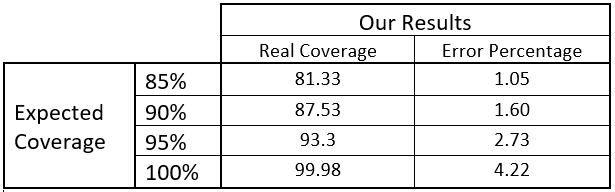